# 단순 회귀 분석(Simple Linear Regression)
### 독립변수 1개

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 자동차 연비 데이터셋 가져오기
df = pd.read_csv('auto-mpg.csv', header=None)
print(df)                        # 컬럼 번호로 출력 ( 0 ~ 8 )

        0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]


In [3]:
# 열 이름 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [4]:
# 데이터 살펴보기
print(df.head())                # 앞에서 5개의 데이터 출력

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [6]:
# 데이터 자료형 확인
print(df.info())                # horsepower컬럼  object(문자형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [7]:
# 데이터 통계 요약정보 확인
print(df.describe())            # horsepower컬럼  object(문자형) 출력안됨

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [8]:
# horsepower 열의 고유값 확인 : ['130.0' '165.0' '150.0' '140.0' ...]
print(df['horsepower'].unique())           # horsepower 열의 고유값 확인
print('\n')                                # horsepower 열의 자료형 object(문자형)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [9]:
# horsepower 열의 자료형 변경 (문자형 ->실수형)
# inplace 옵션이 True이면, 명령어를 실행 한 후 메소드가 적용된 데이터 프레임으로 반환 한다.
df['horsepower'].replace('?', np.nan, inplace=True)     # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')     # 문자형을 실수형으로 변환

In [10]:
print(df.describe())         # 문자형에서 실수형으로 변환된 horsepower컬럼 출력됨

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [11]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())                  # 앞에서 5개의 데이터 출력

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


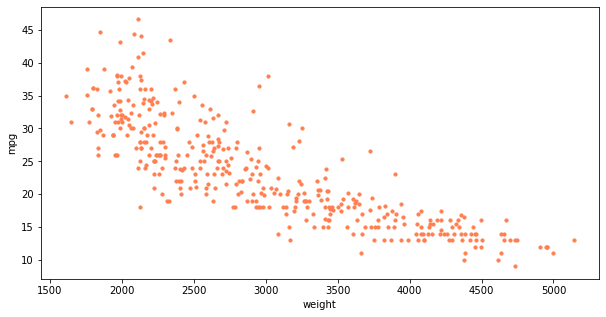

In [12]:
# 독립변수(x)인 weight(중량)와 종속 변수(y)인 mpg(연비) 간의 선형관계를 산점도 그래프로 확인
# 1.matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

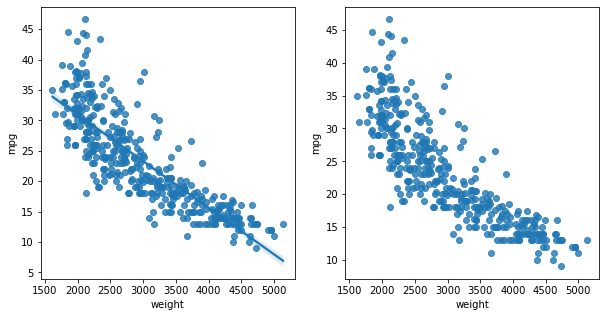

In [13]:
# 2.seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)              # 1행 2열 첫번째 그래프
ax2 = fig.add_subplot(1, 2, 2)              # 1행 2열 두번째 그래프
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, fit_reg=True)   # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

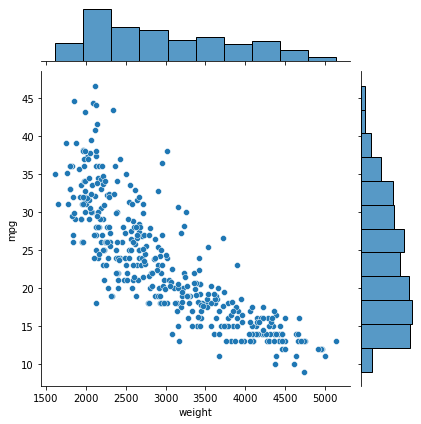

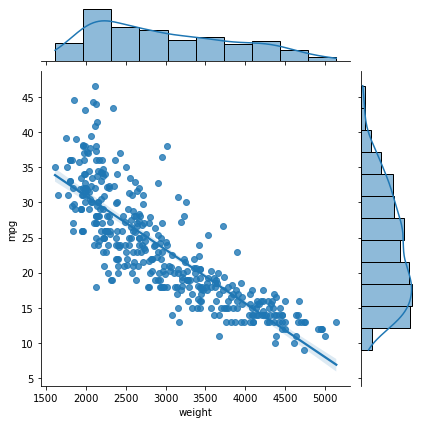

In [14]:
# 3.seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

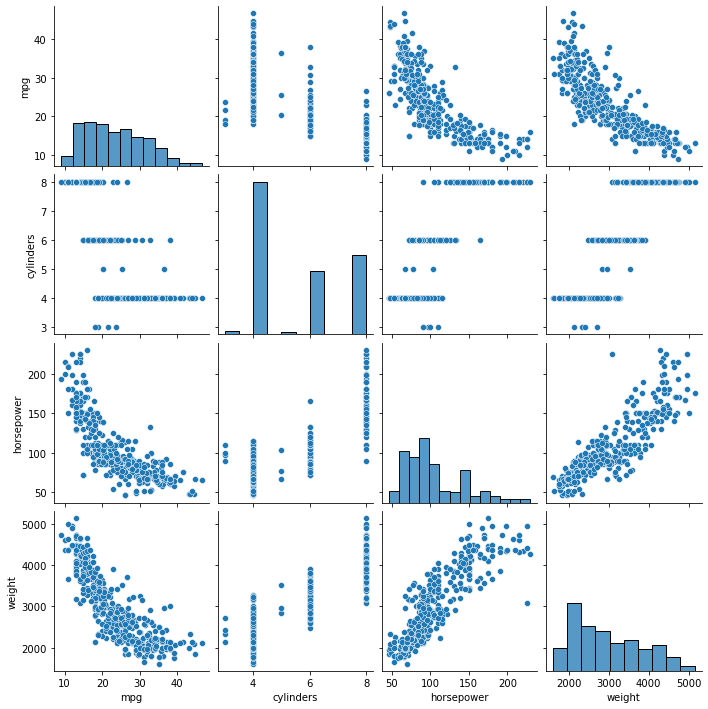

In [15]:
# 4.seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [16]:
# 속성(변수) 선택
x=ndf[['weight']]               # 독립 변수 x
y=ndf['mpg']                    # 종속 변수 y

In [17]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,               # 독립 변수
                                                    y,               # 종속 변수
                                                    test_size=0.3,   # 검증 30%
                                                    random_state=10) # 랜덤 추출 값

In [18]:
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  274
test data 개수:  118


In [19]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

In [20]:
# 단순회귀분석 모델 객체 생성
model = LinearRegression() 

In [21]:
# train data를 가지고 모델학습
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = model.score(x_test, y_test)
print(r_square)                         # 0.6822458558299325

0.6822458558299325


In [23]:
# 회귀식의 기울기
print('기울기 a: ', model.coef_)          # [-0.00775343]

기울기 a:  [-0.00775343]


In [24]:
# 회귀식의 y절편
print('y절편 b', model.intercept_)       # 46.7103662572801

y절편 b 46.710366257280086


In [25]:
# 모델에 전체 x데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = model.predict(x)                # 예측값 구함

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


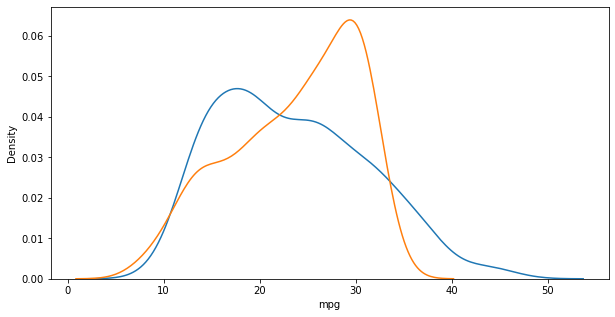

In [26]:
# 모델이 예측한값(y_hat)과 실제값(y_test) 분포 비교

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")                    # 실제 값
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)    # 예측한 값
plt.show()
plt.close()

# 모델이 예측한 값(y_hat)와 실제 값(y) 비교 결과
# 1.출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고, 예측값은 반대로 오른쪽으로 
#  편중되는 경향을 보인다. 
# 2.따라서 독립변수(weight)와 종속변수(mpg) 사이에 선형관계가 있지만, 
#   모델의 오차를 더 줄일 필요가 있어 보인다.

# 실제 값(y) : 파랑색
# 예측한 값(y_hat) : 노랑색